<a href="https://colab.research.google.com/github/desirajusantosh/DS/blob/master/sample_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid')]

In [5]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/mnist_sample/train/7'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3')]

In [0]:
tfms = get_transforms(do_flip=False)

In [0]:
data = ImageDataBunch.from_folder(path,ds_tfms=tfms,size=26)

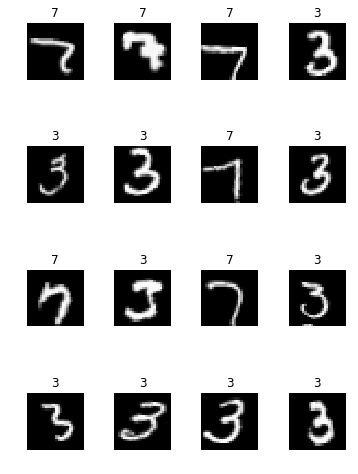

In [8]:
data.show_batch(4,figsize=(5,7))

In [9]:
data.c

2

In [10]:
learn = cnn_learner(data,models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:02, 32924715.09it/s]


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,time
0,0.203626,0.084220,05:32
1,0.106552,0.049734,05:21
2,0.069282,0.024910,05:34
3,0.062627,0.026910,05:36


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

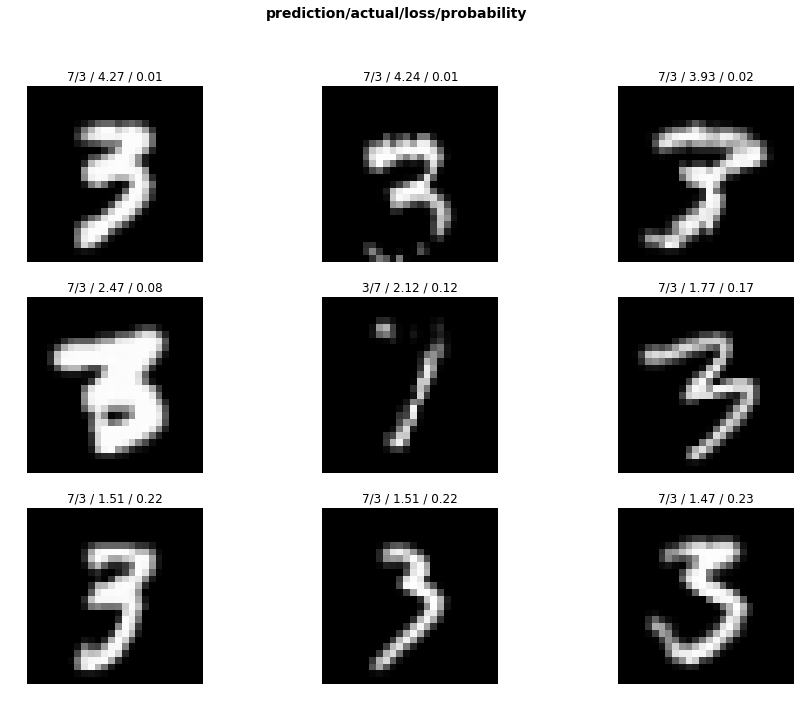

In [16]:
interp.plot_top_losses(9, figsize=(15,11))


In [0]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
0,0.020920,0.002823,08:13


In [19]:
learn.lr_find() 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Text(0.5, 1.0, 'Loss Vs Learning Rate')

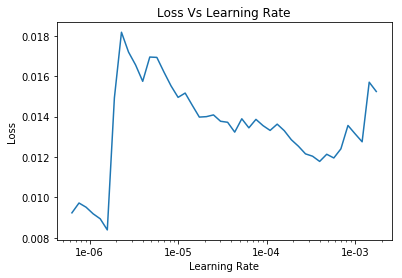

In [20]:
learn.recorder.plot()
plt.title("Loss Vs Learning Rate")

In [0]:
learn.unfreeze() 
learn.fit_one_cycle(2, max_lr=slice(1e-7,1e-6))

epoch,train_loss,valid_loss,time
